# Regularization and Cross-Validation
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Ridge Regression** to control overfitting
- implement **Logistic Regression with regularization** to control overfitting 
- implement **Cross-Validation** to control overfitting

In [224]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [225]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
y = digit_train['y']
print(X.shape)
print(y.shape)
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']
print(X_test.shape)
print(y_test.shape)

(784, 200)
(1, 200)
(784, 1991)
(1, 1991)


In [226]:
def show_digit(fea):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    idx = np.random.permutation(X.shape[1])
    fea = fea[:, idx[:100]]
    faceW = 28
    faceH = 28
    numPerLine = 20
    ShowLine = 4
    Y = np.zeros((faceH * ShowLine, faceW * numPerLine), dtype=np.float)
    for i in range(ShowLine):
        for j in range(numPerLine):
            Y[i * faceH:(i + 1) * faceH, j * faceW:(j + 1) * faceW] = fea[:,i * numPerLine + j].reshape((faceH, faceW))            
    plt.imshow(Y, cmap='gray')

### Ridge Regression and LOOCV

(784, 200)
i=0
j=0
j=1
j=2
j=3
j=4
j=5
j=6
j=7
j=8
j=9
j=10
j=11
j=12
j=13
j=14
j=15
j=16
j=17
j=18
j=19
j=20
j=21
j=22
j=23
j=24
j=25
j=26
j=27
j=28
j=29
j=30
j=31
j=32
j=33
j=34
j=35
j=36
j=37
j=38
j=39
j=40
j=41
j=42
j=43
j=44
j=45
j=46
j=47
j=48
j=49
j=50
j=51
j=52
j=53
j=54
j=55
j=56
j=57
j=58
j=59
j=60
j=61
j=62
j=63
j=64
j=65
j=66
j=67
j=68
j=69
j=70
j=71
j=72
j=73
j=74
j=75
j=76
j=77
j=78
j=79
j=80
j=81
j=82
j=83
j=84
j=85
j=86
j=87
j=88
j=89
j=90
j=91
j=92
j=93
j=94
j=95
j=96
j=97
j=98
j=99
j=100
j=101
j=102
j=103
j=104
j=105
j=106
j=107
j=108
j=109
j=110
j=111
j=112
j=113
j=114
j=115
j=116
j=117
j=118
j=119
j=120
j=121
j=122
j=123
j=124
j=125
j=126
j=127
j=128
j=129
j=130
j=131
j=132
j=133
j=134
j=135
j=136
j=137
j=138
j=139
j=140
j=141
j=142
j=143
j=144
j=145
j=146
j=147
j=148
j=149
j=150
j=151
j=152
j=153
j=154
j=155
j=156
j=157
j=158
j=159
j=160
j=161
j=162
j=163
j=164
j=165
j=166
j=167
j=168
j=169
j=170
j=171
j=172
j=173
j=174
j=175
j=176
j=177
j=178
j=179
j=180
j=181
j=1

j=105
j=106
j=107
j=108
j=109
j=110
j=111
j=112
j=113
j=114
j=115
j=116
j=117
j=118
j=119
j=120
j=121
j=122
j=123
j=124
j=125
j=126
j=127
j=128
j=129
j=130
j=131
j=132
j=133
j=134
j=135
j=136
j=137
j=138
j=139
j=140
j=141
j=142
j=143
j=144
j=145
j=146
j=147
j=148
j=149
j=150
j=151
j=152
j=153
j=154
j=155
j=156
j=157
j=158
j=159
j=160
j=161
j=162
j=163
j=164
j=165
j=166
j=167
j=168
j=169
j=170
j=171
j=172
j=173
j=174
j=175
j=176
j=177
j=178
j=179
j=180
j=181
j=182
j=183
j=184
j=185
j=186
j=187
j=188
j=189
j=190
j=191
j=192
j=193
j=194
j=195
j=196
j=197
j=198
j=199
lmbda = 1000.0, E_Train = 0.015, E_Test = 0.62


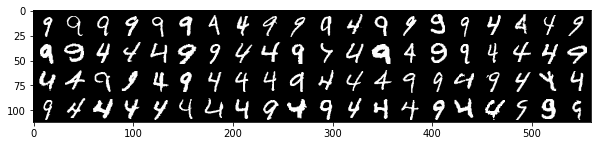

In [227]:
show_digit(X)
# Do feature normalization here
# begin answer
X = (X - np.mean(X)) / np.std(X)
X_test = (X_test - np.mean(X_test)) / np.std(X_test)
# end answer

# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
P, N = X.shape
Pt, Nt = X_test.shape
L = len(lmbdas)
E = np.zeros(len(lmbdas))
ws = np.zeros((P + 1, L))
E_val_min = float('inf')
b = np.ones((1, N))
x = np.vstack((b, X))
bt = np.ones((1, Nt))
xt = np.vstack((bt, X_test))
y = y[0]
print(X.shape)
from ridge import ridge

for i in range(len(lmbdas)):
    print('i={}'.format(i))
    E_val = 0
    for j in range(X.shape[1]):
        print('j={}'.format(j))
        X_ = np.hstack((x[:,0:j], x[:,j+1:N]))  # take point j out of X
        y_ = np.array(y).tolist()
        y_.pop(j)
        w = ridge(X_, y_, lmbdas[i])
        tmp = np.dot(w.T,np.array([x[:,j]]).T)
        if  tmp[0,0] * y[j] < 0:
             E_val = E_val + 1
    E[i] = E_val
    for k in range(P+1):
        ws[k, i] = w[k]

    # Update lmbda according validation error
    # begin answer
    # end answer
    
# Compute training error
E = np.array(E).tolist()
index = E.index(min(E))
s1 = np.sum(np.array([ws[:, index]]).T * x ,axis=0)
s2 = np.sum(s1 * y < 0)
E_Train = s2/N
s1t = np.sum(np.array([ws[:, index]]).T * xt ,axis=0)
s2t = np.sum(s1t * y_test < 0)
E_Test = s2t/N
lmbda = lmbdas[index]
print('lmbda = {}, E_Train = {}, E_Test = {}'.format(lmbda, E_Train, E_Test))
# Do feature normalization to X_test, y_test
# ...
# Compute test error

### Logistic Regression with Regularization
Use the simlimar skeleton code above to implement it.

In [ ]:
from logistic_r import logistic_r

lmbda = 0
E_val_min = float('inf')
for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = __  # take point j out of X
        y_ = __ 
        w = logistic_r(X, y, lmbdas[i])
        E_val = Eval + __
        
    # Update lmbda according validation error
    # begin answer
    # end answer
    
# Compute training error


# Compute test error